<a href="https://colab.research.google.com/github/Someshwarms/Emotion-detectuin-with-CNN/blob/main/Emotion_detection_on_the_basis_of_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


**Importing the dataset**

In [ ]:
fldr="/content/drive/MyDrive/CK+48"

**Importing all the packages which is required**

In [ ]:
import os 
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
files=os.listdir(fldr)
print(files)

['disgust', 'sadness', 'anger', 'fear', 'happy', 'surprise', 'contempt']


**Class labels of the images in the dataste**

In [ ]:
Exp=['fear', 'contempt', 'happy', 'anger', 'surprise', 'disgust', 'sadness']

**Loading all the images present in the dataset**

In [ ]:
i=0
last=[]
images=[]
labels=[]
for fle in files:
  idx=Exp.index(fle)
  label=idx
  
  total=fldr+'/'+fle
  files_exp= os.listdir(total)

  for fle_2 in files_exp:
    file_main=total+'/'+fle_2
    print(file_main+"   "+str(label))
    image= cv2.imread(file_main)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(label)
    i+=1
  last.append(i)

/content/drive/MyDrive/CK+48/disgust/S128_004_00000013.png   5
/content/drive/MyDrive/CK+48/disgust/S131_010_00000016.png   5
/content/drive/MyDrive/CK+48/disgust/S073_006_00000012.png   5
/content/drive/MyDrive/CK+48/disgust/S065_005_00000007.png   5
/content/drive/MyDrive/CK+48/disgust/S128_004_00000012.png   5
/content/drive/MyDrive/CK+48/disgust/S046_004_00000016.png   5
/content/drive/MyDrive/CK+48/disgust/S090_006_00000010.png   5
/content/drive/MyDrive/CK+48/disgust/S088_004_00000020.png   5
/content/drive/MyDrive/CK+48/disgust/S071_006_00000012.png   5
/content/drive/MyDrive/CK+48/disgust/S134_008_00000011.png   5
/content/drive/MyDrive/CK+48/disgust/S132_005_00000016.png   5
/content/drive/MyDrive/CK+48/disgust/S052_006_00000012.png   5
/content/drive/MyDrive/CK+48/disgust/S055_003_00000007.png   5
/content/drive/MyDrive/CK+48/disgust/S128_004_00000011.png   5
/content/drive/MyDrive/CK+48/disgust/S068_005_00000020.png   5
/content/drive/MyDrive/CK+48/disgust/S108_006_00000020.

**Image preprocessing**

In [ ]:
last

[177, 261, 396, 471, 678, 927, 981]

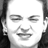

In [ ]:
cv2_imshow(images[24])

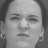

In [ ]:
cv2_imshow(images[40])

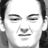

In [ ]:
cv2_imshow(images[82])

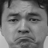

In [ ]:
cv2_imshow(images[200])

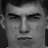

In [ ]:
cv2_imshow(images[300])

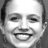

In [ ]:
cv2_imshow(images[500])

In [ ]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
images=np.array(images)
labels=np.array(labels)
images_1=images/255

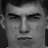

In [ ]:
cv2_imshow(images[300])

In [ ]:
images_1.shape

(981, 48, 48, 3)

In [ ]:
labels.shape

(981,)

In [ ]:
number_of_classes=7
label_encoded=tf.keras.utils.to_categorical(labels,num_classes=number_of_classes)

**Splitting the dataset into training and testing part**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(images_1,label_encoded,test_size=0.25)

**Model creation**

In [ ]:
#model_creation
def convolution(input_tensors,filters):
  x=tf.keras.layers.Conv2D(filters=filters,kernel_size=(3,3),padding='same',strides=(1,1),kernel_regularizer=tf.keras.regularizers.l2(0.002))(input_tensors)
  x=tf.keras.layers.Dropout(0.1)(x)
  x=tf.keras.layers.Activation('relu')(x)
  return x

def model(input_shape):
  inputs=tf.keras.layers.Input((input_shape))
  conv1=convolution(inputs,32)
  max1=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
  conv2=convolution(max1,64)
  max2=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
  conv3=convolution(max2,128)
  max3=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv3)
  conv4=convolution(max3,256)
  max4=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv4)
  flatten=tf.keras.layers.Flatten()(max4)
  dense1=tf.keras.layers.Dense(128,activation='relu')(flatten)
  drop1=tf.keras.layers.Dropout(0.2)(dense1)
  dense2=tf.keras.layers.Dense(7,activation='softmax')(drop1)
  model=tf.keras.models.Model(inputs=[inputs],outputs=[dense2])
  model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
  return model

In [ ]:
Model=model(input_shape=(48,48,3))

In [ ]:
Model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

In [ ]:
fle_s='Emotion_detection.h5'

In [ ]:
history=Model.fit(X_train,y_train,batch_size=32,validation_data=(X_test,y_test),epochs=500)

Epoch 1/500
23/23 [==============================] - 1s 23ms/step - loss: 0.3556 - accuracy: 0.9469 - val_loss: 0.4535 - val_accuracy: 0.9024
Epoch 2/500
23/23 [==============================] - 1s 22ms/step - loss: 0.3030 - accuracy: 0.9605 - val_loss: 0.4131 - val_accuracy: 0.9390
Epoch 3/500
23/23 [==============================] - 0s 22ms/step - loss: 0.2964 - accuracy: 0.9687 - val_loss: 0.4589 - val_accuracy: 0.9146
Epoch 4/500
23/23 [==============================] - 1s 22ms/step - loss: 0.2838 - accuracy: 0.9741 - val_loss: 0.4499 - val_accuracy: 0.9187
Epoch 5/500
23/23 [==============================] - 0s 21ms/step - loss: 0.3166 - accuracy: 0.9537 - val_loss: 0.4365 - val_accuracy: 0.9146
Epoch 6/500
23/23 [==============================] - 0s 21ms/step - loss: 0.3653 - accuracy: 0.9388 - val_loss: 0.4618 - val_accuracy: 0.9187
Epoch 7/500
23/23 [==============================] - 0s 22ms/step - loss: 0.2822 - accuracy: 0.9687 - val_loss: 0.4061 - val_accuracy: 0.9309
Epoch 

**Graphical representation or perfromance of the model**

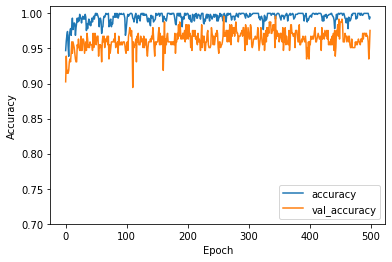

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.01])
plt.legend(loc='lower right')

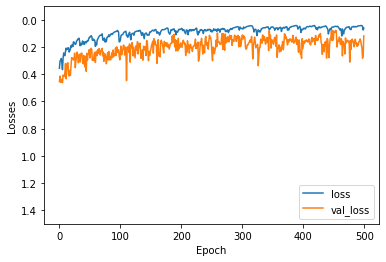

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.ylim([1.5,-0.1])
plt.legend(loc='lower right')

**Model Evaluation**

In [ ]:
score = Model.evaluate(X_train,y_train)

23/23 [==============================] - 0s 13ms/step - loss: 0.0467 - accuracy: 1.0000


In [ ]:
score = Model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 7ms/step - loss: 0.1172 - accuracy: 0.9756


In [ ]:
Pred=Model.predict(X_test)

In [ ]:
Pred

array([[1.1853207e-08, 9.2167767e-08, 1.0336078e-04, ..., 1.7851597e-04,
        9.9970835e-01, 5.4103120e-06],
       [1.4903280e-04, 7.3377814e-05, 4.6659861e-06, ..., 7.8948651e-04,
        4.1675828e-03, 2.2477405e-03],
       [9.9988079e-01, 1.0461091e-05, 7.7559016e-06, ..., 9.2605085e-05,
        5.4535428e-07, 7.6902634e-06],
       ...,
       [9.5072848e-01, 1.3324603e-02, 3.5851222e-02, ..., 9.5529074e-05,
        3.3159505e-08, 8.9097973e-08],
       [9.1682532e-06, 1.3770528e-09, 9.9999058e-01, ..., 1.0422080e-08,
        2.6583339e-07, 9.4139831e-17],
       [6.5914271e-08, 3.5616598e-08, 9.9999368e-01, ..., 4.8949105e-06,
        1.2608161e-06, 5.9654125e-14]], dtype=float32)

In [ ]:
len(Pred)

246

**Predicting the emotion of the images**

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  print("Label actual:  " + Exp[labels[ind]]  )
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  pred_class=Exp[int(np.argmax(pred_1))]
  print("Predicted Label: "+ pred_class)

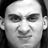

Label actual:  disgust
Predicted Label: disgust


In [ ]:
test_image(72,images,images_1,Model)

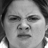

Label actual:  disgust
Predicted Label: disgust


In [ ]:
test_image(36,images,images_1,Model)


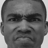

Label actual:  anger
Predicted Label: anger


In [ ]:
test_image(369,images,images_1,Model)


In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [ ]:
i=0
Y_test_l=[]
Pred_l=[]
while(i<len(Pred)):
  Y_test_l.append(int(np.argmax(y_test[i])))
  Pred_l.append(int(np.argmax(Pred[i])))
  i+=1

In [ ]:
report=classification_report(Y_test_l, Pred_l)

**Precision,Recall and F1 score score of the model**

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.86      0.93        22
           2       1.00      1.00      1.00        53
           3       0.92      1.00      0.96        35
           4       1.00      0.98      0.99        50
           5       1.00      0.96      0.98        47
           6       1.00      1.00      1.00        21

    accuracy                           0.98       246
   macro avg       0.97      0.97      0.97       246
weighted avg       0.98      0.98      0.98       246



**Confusion matrix**

In [ ]:
results=confusion_matrix(Y_test_l, Pred_l)

In [ ]:
print(results)

[[18  0  0  0  0  0  0]
 [ 3 19  0  0  0  0  0]
 [ 0  0 53  0  0  0  0]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  1 49  0  0]
 [ 0  0  0  2  0 45  0]
 [ 0  0  0  0  0  0 21]]


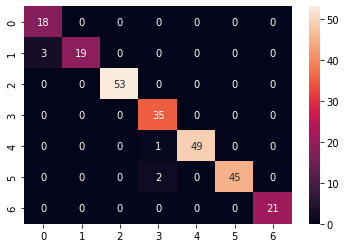

In [ ]:
import seaborn as sns
sns.heatmap(results, annot=True)